#### Importing Libraries

In [118]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Importing Datasets

I have already imported the dataset. If you want to use a different dataset, then you can give its path down below.

The shape of X should be (n, m),
And that of Y should be (10, m)

Here, 
- n = total number of features
- m = total number of observations in our dataset
- 10 = number of output classes

In [121]:
X_train = np.loadtxt('train_X.csv', delimiter = ',')
Y_train = np.loadtxt('train_label.csv', delimiter = ',')

# X_train = pd.read_csv('dataset//train_X.csv')
# Y_train = pd.read_csv('dataset//train_label.csv')

# X_train = X_train.T
# Y_train = Y_train.T

In [122]:
X_test = np.loadtxt('test_X.csv', delimiter = ',')
Y_test = np.loadtxt('test_label.csv', delimiter = ',')

# X_test = X_test.T
# Y_test = Y_test.T

# X_test = pd.read_csv('dataset//test_X.csv')
# Y_test = pd.read_csv('dataset//test_label.csv')

In [123]:
print("shape of X_train : ", X_train.shape)
print("shape of Y_train : ", Y_train.shape)

print("shape of X_test : ", X_test.shape)
print("shape of Y_test : ", Y_test.shape)

shape of X_train :  (999, 784)
shape of Y_train :  (999, 10)
shape of X_test :  (349, 784)
shape of Y_test :  (349, 10)


In [124]:
# X_train = X_train.values
# Y_train = Y_train.values
# X_test = X_test.values
# Y_test = Y_test.values

In [199]:
X_train = np.loadtxt('dataset//train_X.csv', delimiter = ',')
Y_train = np.loadtxt('dataset//train_label.csv', delimiter = ',')

X_test = np.loadtxt('dataset//test_X.csv', delimiter = ',')
Y_test = np.loadtxt('dataset//test_label.csv', delimiter = ',')

### Visualizing our Dataset

Our dataset is in the form of numbers. So, to visualize it properly, we will display it in the form of image

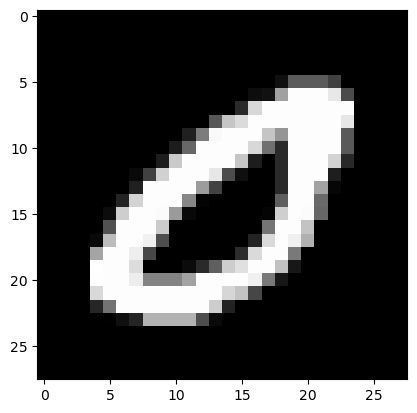

In [200]:
# index = int(random.randrange(0,X_train.shape[0]))
index = 1
plt.imshow(X_train[index, :].reshape(28,28), cmap = 'gray')
plt.show()

# Model

![nn](Images/nn.png)

## Initialize parameters Randomly
$ W_1 = np.random.randn(n_1, n_0) $

$ b_1 = np.zeros((n_1, 1))$

$ W_2 = np.random.randn(n_2, n_1) $

$ b_2 = np.zeros((n_2, 1))$


## *Repeat Below Steps for many times : *


## Forward Propagation 

$ Z_1 = W_1 * X + B_1 $

$ A_1 = f ( Z_1 ) $  

$ Z_2 = W2 * A_1 + B_2 $

$ A_2 = Softmax( Z_2 ) $

## Softmax 

$ a_i = \frac{e^{z_i}}{\sum_{i=k}^ne^{z_k}}$


## Cost Function 

$Loss = - \sum_{i=k}^{n}[ y_k*log(a_k) ]$

$Cost = - \frac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{n}[ y_k*log(a_k) ]$



## Backward Propagation
$dZ_2 = ( A_2 - Y )$

$ dW_2 = \frac{1}{m}. dZ_2 . A_1^T$

$ dB_2 = \frac{1}{m}.sum(dZ_2, 1)$



$dZ_1 = W_2^T . dZ_2 * f_1^|(Z_1) $

$dW_1 = \frac{1}{m}.dZ_1.X^T$

$dB_1 = \frac{1}{m}.sum(dZ_1, 1)$


## Updating Parameters

$ W_2 = W_2 -  \alpha * \frac{\partial Cost }{\partial W_2}$ 

$ B_2 = B_2 -  \alpha * \frac{\partial Cost }{\partial B_2}$ 

$ W_1 = W_1 -  \alpha * \frac{\partial Cost }{\partial W_1}$ 

$ B_1 = B_1 -  \alpha * \frac{\partial Cost }{\partial B_1}$ 


# Activation Functions

***Now, its your time to implement !***

Complete the below functions for Activations.

In [127]:
# def tanh(x):
#     ## Your Code Here ##
#     return np.tanh(x)
#     ## Code Ends ##
# def relu(x):
#     ## Your Code Here ##
#     return np.maximum(x,0)
#     ## Code Ends ##
# def softmax(z):
#     ## Your Code Here ##
#     expX = np.exp(z)
#     return expX/np.sum(expX, axis = 0)
#     ## Code Ends ##

In [128]:
# def derivative_tanh(x):
#     ## Your Code Here ##
#     return (1 -  np.power(np.tanh(x), 2))
#     ## Code Ends ##

# def derivative_relu(x):
#     ## Your Code Here ##
#     return np.array( x>0, dtype = np.float32)
#     ## Code Ends ##

In [350]:
def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(x, 0)

def softmax(x):
    print("soft ")
    expX = np.exp(x)
    print(expX.shape)
    print(np.sum(expX, axis = 1, keepdims = True).shape)
    return expX/np.sum(expX, axis = 1,  keepdims = True)

In [351]:
def derivative_tanh(x):
    return (1 - np.power(np.tanh(x), 2))

def derivative_relu(x):
    return np.array(x > 0, dtype = np.float32)

In [352]:
def initialize_parameters(n_x, n_h, n_y):
    
    ## Complete the code below ##
    w1 = np.ones((n_x, n_h))*0.01
    b1 = np.zeros((1,n_h))
    
    w2 = np.ones((n_h, n_y))*0.01
    b2 = np.zeros((1,n_y))
    ## Your Code ends ##
#     print("ini ")
#     print(w1.shape)
    parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    print("initialize ")
    print(w1.shape)
    print(b1.shape)
    
    print(w2.shape)
    print(b2.shape)
    
    return parameters

In [353]:
def forward_prop(x, parameters):
    
    # To fetch the parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2']
    
    ## Complete the Code below : ##
#     print("shape ")
#     print(w1.shape)
#     print(x.shape)
    z1 = np.dot(x, w1)+b1 #(m,n1)
    a1 = tanh(z1)
    
    z2 = np.dot(a1, w2)+b2 
    print("z2")
    print(z2.shape)
    a2 = softmax(z2) #(m,n2)
    ## Your Code ends ##
    
    # To return our Zs and As
    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }
    
    print("forward shape ")
    print(z1.shape)
    print(a1.shape)
    
    print(z2.shape)
    print(a2.shape)
    
    return forward_cache

In [354]:
def cost_function(a2, y):
    
    ## Your Code Here ##
    m = y.shape[0]
    
    cost = -(1/m)*np.sum(y*np.log(a2))
    
    return cost
    
    ## Code Ends ##

In [355]:
def backward_prop(x, y, parameters, forward_cache):
    
    m = x.shape[0]
    
    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    # Fetching our forward_cache
    a1 = forward_cache['a1']
    a2 = forward_cache['a2']
    
    
    ## Complete the Code below ##
    dz2 = (a2-y)   #(m, n2)
    dw2 = (1/m)*np.dot(a1.T, dz2)   #(n1, n2)
    db2 = (1/m)*np.sum(dz2, axis = 0, keepdims = True)  #(1, n2)    
    
    dz1 = (1/m)*np.dot(dz2, w2.T)*derivative_relu(a1)  #(m,n1)*(m,n1)
    dw1 = (1/m)*np.dot(x.T, dz1) #(n0, n1)
    db1 = (1/m)*np.sum(dz1, axis = 0,keepdims = True) #(1,n1)
    ## Your Code ends ##
    
    ## Returning the Gradients
    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2, 
        "db2" : db2
    }
    
    print("grad ")
    print(dw1.shape, dw1)
    print(db1.shape, db1)

    print(dw2.shape, dw2)
    print(db2.shape, db2)
    
    return gradients

# Update Parameters

In [356]:
def update_parameters(parameters, gradients, learning_rate):
    
    # Fetching our parameters
    w1 = parameters['w1']
    b1 = parameters['b1']
    w2 = parameters['w2']
    b2 = parameters['b2'] 
    
    # Fetching our gradients
    dw1 = gradients['dw1']
    db1 = gradients['db1']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    
    ## Complete the Code below ##
    w1 = w1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    ## Your code ends ##
    
    # Returning the updated parameters
    Parameters = {
        "w1" : w1, 
        "b1" : b1, 
        "w2" : w2,
        "b2" : b2
    }
    
    return Parameters

In [357]:
def model(x, y, n_h, learning_rate, iterations):
    
    ## Complete the Code Below ##
    n_x =  x.shape[1]                      # must return the number of neurons/features in input layer
    n_y =  y.shape[1]             # must return the number of neurons in output layer
    ## Your Code ends ##
    
    cost_list = []
    
    ## Complete the Code Below ##
    parameters = initialize_parameters(n_x, n_h, n_y)
    ## Your Code ends ##
    
    ## Complete the Code Below ##
    for i in range(iterations):
        
        # Forward Propagation
        forward_cache = forward_prop(x, parameters)
        # Cost Function
        cost = cost_function(forward_cache['a2'], y)
        
        # Backward propagation
        gradients = backward_prop(x, y, parameters, forward_cache)
        
        # Update Parameters
        parameters = update_parameters(parameters, gradients, learning_rate)
        
        cost_list.append(cost    )
        
        if i%(iterations/10) == 0 :
            print("cost after", i, "iters is" ,     cost   )
            
            
    ## Your Code ends ##
    
    
    return parameters, cost_list

In [358]:
## Complete the Code Below ##

n_h = 2
learning_rate = 0.002
iterations = 1

## Your Code ends ##

Parameters, Cost_list = model(X_train, Y_train, n_h = n_h, learning_rate = learning_rate, iterations = iterations)

initialize 
(784, 2)
(1, 2)
(2, 10)
(1, 10)
z2
(1000, 10)
soft 
(1000, 10)
(1000, 1)
forward shape 
(1000, 2)
(1000, 2)
(1000, 10)
(1000, 10)
grad 
(784, 2) [[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [0. 0.]
 [0. 0.]
 [0. 0.]]
(1, 2) [[2.74953671e-24 2.74953671e-24]]
(2, 10) [[-0.001 -0.018  0.013 -0.008  0.004  0.008  0.008 -0.003 -0.009  0.006]
 [-0.001 -0.018  0.013 -0.008  0.004  0.008  0.008 -0.003 -0.009  0.006]]
(1, 10) [[-0.001 -0.018  0.013 -0.008  0.004  0.008  0.008 -0.003 -0.009  0.006]]
cost after 0 iters is 2.302585092994046


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

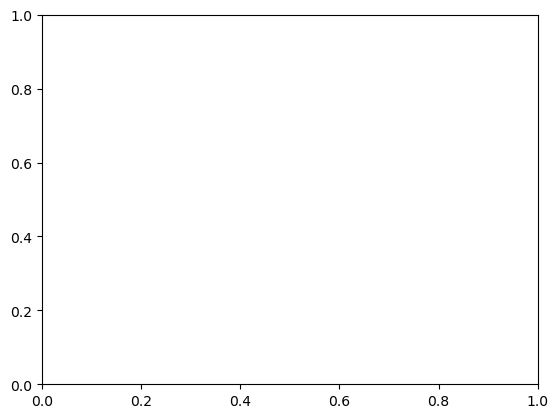

In [359]:
t = np.arange(0, iterations+1)
plt.plot(t, Cost_list)
plt.show()

# Checking Accuracy

Run the below cells to check your model Accuracy 

In [ ]:
def accuracy(inp, labels, parameters):
    forward_cache = forward_prop(inp, parameters)
    a_out = forward_cache['a2']   # containes propabilities with shape(10, 1)
    
    a_out = np.argmax(a_out, 0)  # 0 represents row wise 
    
    labels = np.argmax(labels, 0)
    
    acc = np.mean(a_out == labels)*100
    
    return acc

In [ ]:
print("Accuracy of Train Dataset", accuracy(X_train, Y_train, Parameters), "%")
print("Accuracy of Test Dataset", round(accuracy(X_test, Y_test, Parameters), 2), "%")

In [360]:
idx = int(random.randrange(0,X_test.shape[1]))
plt.imshow(X_test[:, idx].reshape((28,28)),cmap='gray')
plt.show()

cache = forward_prop(X_test[:, idx].reshape(X_test[:, idx].shape[0], 1), Parameters)
a_pred = cache['a2']  
a_pred = np.argmax(a_pred, 0)

print("Our model says it is :", a_pred[0])

ValueError: cannot reshape array of size 350 into shape (28,28)